In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# **Dataset**

In [8]:
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

In [9]:
df = pd.read_csv('../input/disease-predicion-dataset-creation/Symptoms_encoded.csv')
df.head()

,Disease,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,muscle_wasting,patches_in_throat,fatigue,weight_loss,sunken_eyes,cough,headache,chest_pain,back_pain,weakness_in_limbs,chills,joint_pain,yellowish_skin,constipation,pain_during_bowel_movements,breathlessness,cramps,weight_gain,mood_swings,neck_pain,muscle_weakness,stiff_neck,pus_filled_pimples,burning_micturition,bladder_discomfort,high_fever,nodal_skin_eruptions,ulcers_on_tongue,loss_of_appetite,restlessness,dehydration,dizziness,weakness_of_one_body_side,lethargy,nausea,abdominal_pain,pain_in_anal_region,sweating,bruising,cold_hands_and_feets,anxiety,knee_pain,swelling_joints,blackheads,foul_smell_of urine,skin_peeling,blister,dischromic _patches,watering_from_eyes,extra_marital_contacts,diarrhoea,loss_of_balance,blurred_and_distorted_vision,altered_sensorium,dark_urine,swelling_of_stomach,bloody_stool,obesity,hip_joint_pain,movement_stiffness,spinning_movements,scurring,continuous_feel_of_urine,silver_like_dusting,red_sore_around_nose,spotting_ urination,passage_of_gases,irregular_sugar_level,family_history,lack_of_concentration,excessive_hunger,yellowing_of_eyes,distention_of_abdomen,irritation_in_anus,swollen_legs,painful_walking,small_dents_in_nails,yellow_crust_ooze,internal_itching,mucoid_sputum,history_of_alcohol_consumption,swollen_blood_vessels,unsteadiness,inflammatory_nails,depression,fluid_overload,swelled_lymph_nodes,malaise,prominent_veins_on_calf,puffy_face_and_eyes,fast_heart_rate,irritability,muscle_pain,mild_fever,yellow_urine,phlegm,enlarged_thyroid,increased_appetite,visual_disturbances,brittle_nails,drying_and_tingling_lips,polyuria,pain_behind_the_eyes,toxic_look_(typhos),throat_irritation,swollen_extremeties,slurred_speech,red_spots_over_body,belly_pain,receiving_blood_transfusion,acute_liver_failure,redness_of_eyes,rusty_sputum,abnormal_menstruation,receiving_unsterile_injections,coma,sinus_pressure,palpitations,stomach_bleeding,runny_nose,congestion,blood_in_sputum,loss_of_smell
0,Fungal infection,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Label Encoding Disease**

In [18]:
# unique diseases

df.Disease.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [11]:
encoder = LabelEncoder()
encoder.fit(df['Disease'])

LabelEncoder()

In [19]:
encode_ref_dict = dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
encode_ref_dict

{'(vertigo) Paroymsal  Positional Vertigo': 0,
 'AIDS': 1,
 'Acne': 2,
 'Alcoholic hepatitis': 3,
 'Allergy': 4,
 'Arthritis': 5,
 'Bronchial Asthma': 6,
 'Cervical spondylosis': 7,
 'Chicken pox': 8,
 'Chronic cholestasis': 9,
 'Common Cold': 10,
 'Dengue': 11,
 'Diabetes ': 12,
 'Dimorphic hemmorhoids(piles)': 13,
 'Drug Reaction': 14,
 'Fungal infection': 15,
 'GERD': 16,
 'Gastroenteritis': 17,
 'Heart attack': 18,
 'Hepatitis B': 19,
 'Hepatitis C': 20,
 'Hepatitis D': 21,
 'Hepatitis E': 22,
 'Hypertension ': 23,
 'Hyperthyroidism': 24,
 'Hypoglycemia': 25,
 'Hypothyroidism': 26,
 'Impetigo': 27,
 'Jaundice': 28,
 'Malaria': 29,
 'Migraine': 30,
 'Osteoarthristis': 31,
 'Paralysis (brain hemorrhage)': 32,
 'Peptic ulcer diseae': 33,
 'Pneumonia': 34,
 'Psoriasis': 35,
 'Tuberculosis': 36,
 'Typhoid': 37,
 'Urinary tract infection': 38,
 'Varicose veins': 39,
 'hepatitis A': 40}

In [21]:
df2 = df.copy()
df2.Disease = encoder.transform(df2['Disease'])
df2.head()

,Disease,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,muscle_wasting,patches_in_throat,fatigue,weight_loss,sunken_eyes,cough,headache,chest_pain,back_pain,weakness_in_limbs,chills,joint_pain,yellowish_skin,constipation,pain_during_bowel_movements,breathlessness,cramps,weight_gain,mood_swings,neck_pain,muscle_weakness,stiff_neck,pus_filled_pimples,burning_micturition,bladder_discomfort,high_fever,nodal_skin_eruptions,ulcers_on_tongue,loss_of_appetite,restlessness,dehydration,dizziness,weakness_of_one_body_side,lethargy,nausea,abdominal_pain,pain_in_anal_region,sweating,bruising,cold_hands_and_feets,anxiety,knee_pain,swelling_joints,blackheads,foul_smell_of urine,skin_peeling,blister,dischromic _patches,watering_from_eyes,extra_marital_contacts,diarrhoea,loss_of_balance,blurred_and_distorted_vision,altered_sensorium,dark_urine,swelling_of_stomach,bloody_stool,obesity,hip_joint_pain,movement_stiffness,spinning_movements,scurring,continuous_feel_of_urine,silver_like_dusting,red_sore_around_nose,spotting_ urination,passage_of_gases,irregular_sugar_level,family_history,lack_of_concentration,excessive_hunger,yellowing_of_eyes,distention_of_abdomen,irritation_in_anus,swollen_legs,painful_walking,small_dents_in_nails,yellow_crust_ooze,internal_itching,mucoid_sputum,history_of_alcohol_consumption,swollen_blood_vessels,unsteadiness,inflammatory_nails,depression,fluid_overload,swelled_lymph_nodes,malaise,prominent_veins_on_calf,puffy_face_and_eyes,fast_heart_rate,irritability,muscle_pain,mild_fever,yellow_urine,phlegm,enlarged_thyroid,increased_appetite,visual_disturbances,brittle_nails,drying_and_tingling_lips,polyuria,pain_behind_the_eyes,toxic_look_(typhos),throat_irritation,swollen_extremeties,slurred_speech,red_spots_over_body,belly_pain,receiving_blood_transfusion,acute_liver_failure,redness_of_eyes,rusty_sputum,abnormal_menstruation,receiving_unsterile_injections,coma,sinus_pressure,palpitations,stomach_bleeding,runny_nose,congestion,blood_in_sputum,loss_of_smell
0,15,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,15,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Splitting Into Train and Test Data**

In [22]:
X = df2.drop('Disease', axis = 1)
y = df2.Disease

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3936, 131)
(3936,)
(984, 131)
(984,)


# **Logistic Regression**

In [29]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [30]:
log_reg.score(X_test,y_test)

1.0

<AxesSubplot:>

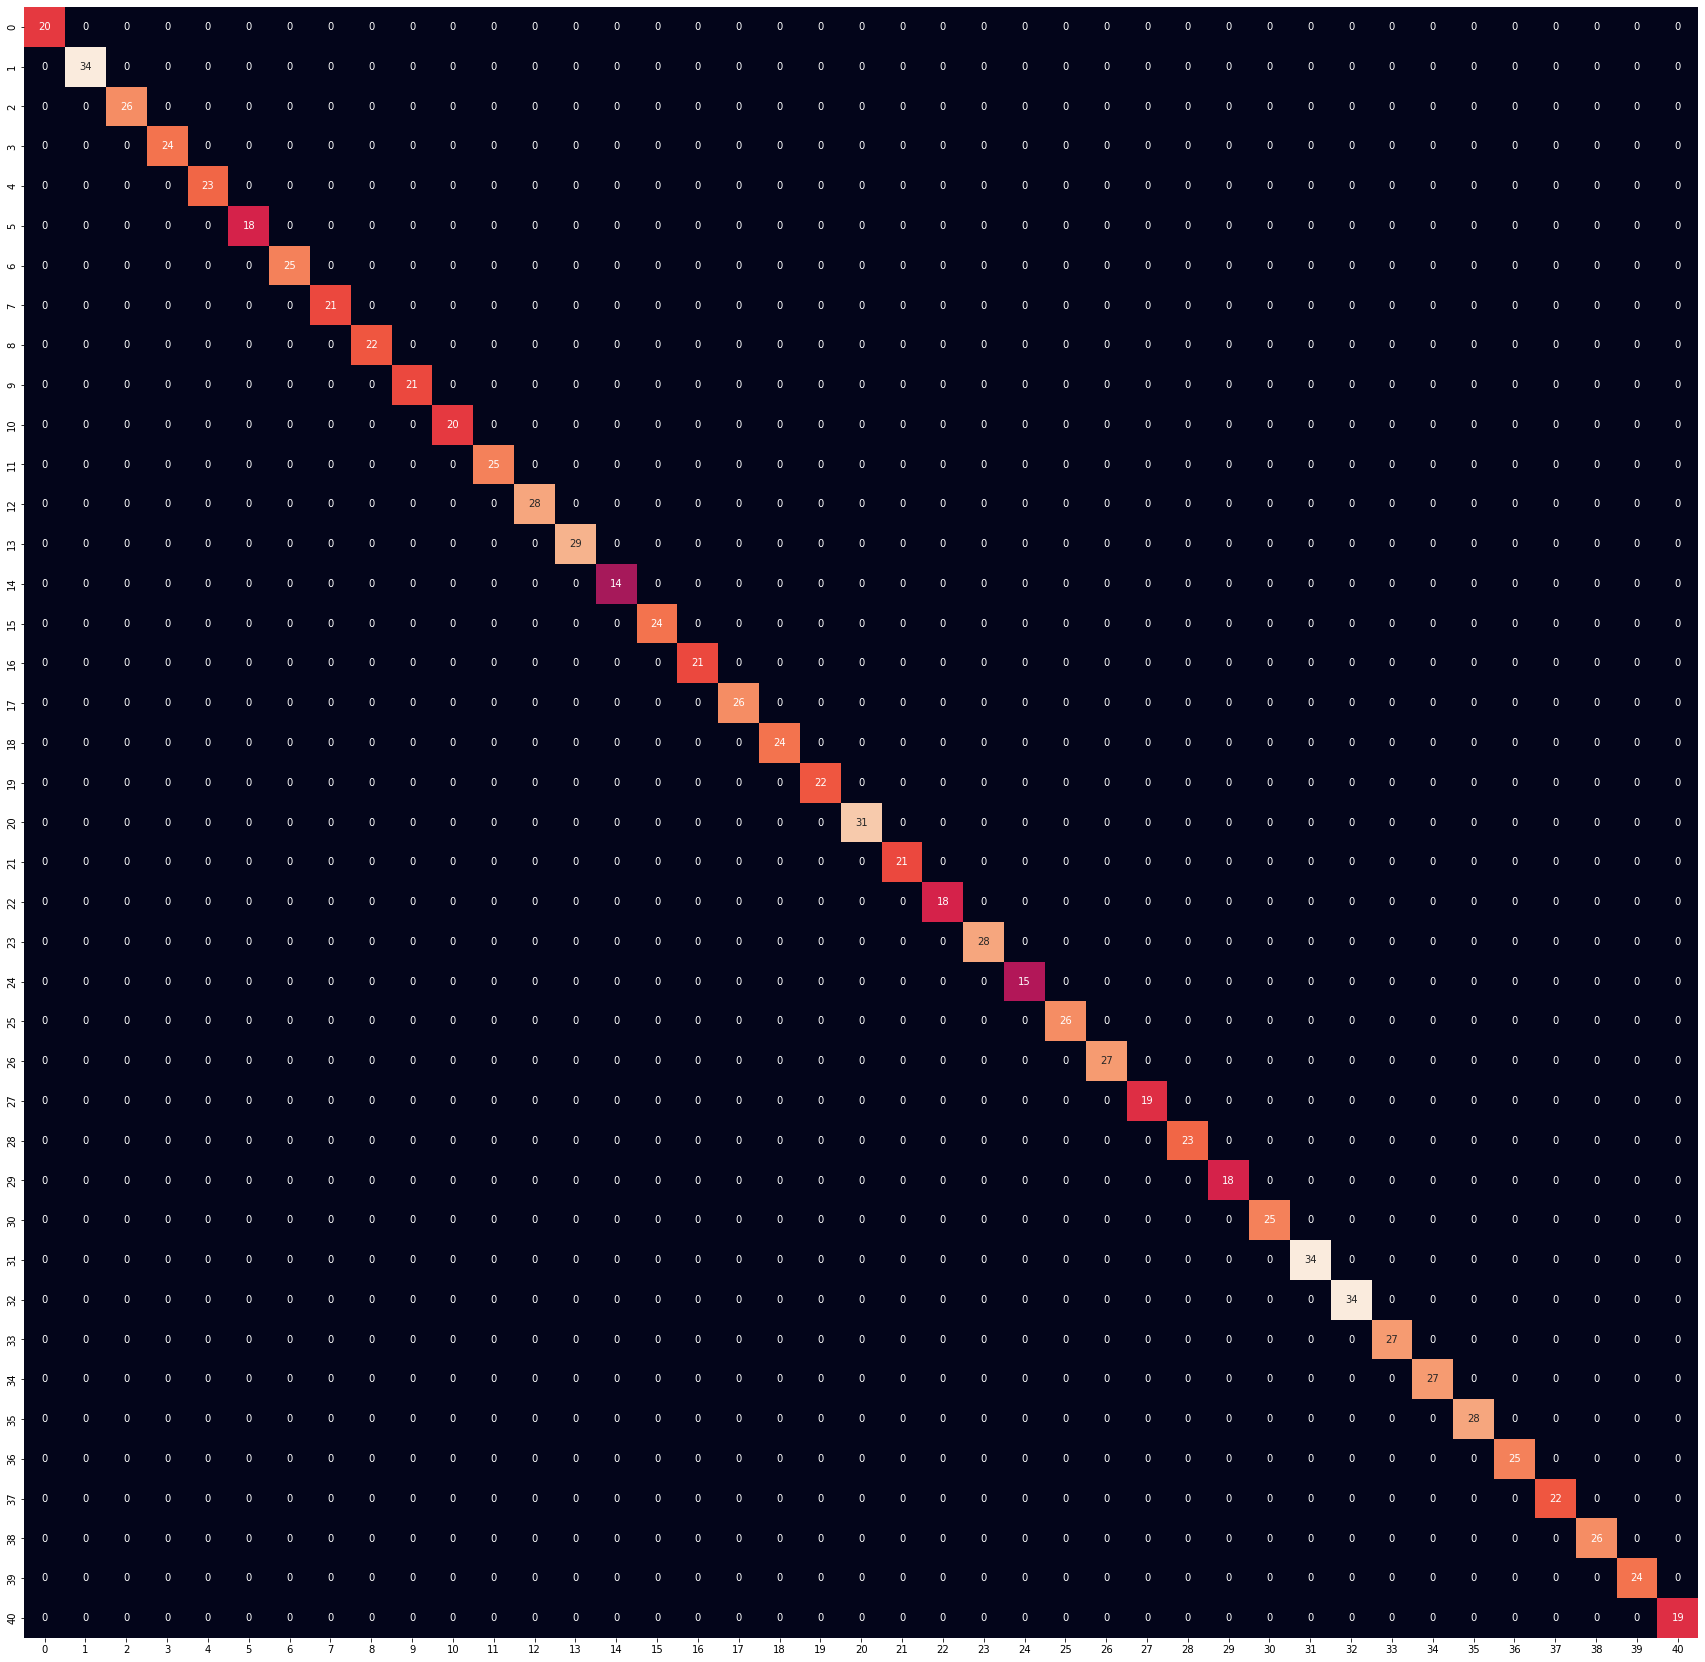

In [37]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(30,30))
sns.heatmap(confusion_matrix(y_test,log_reg.predict(X_test)), annot = True,cbar= False)

In [38]:
import joblib

In [39]:
joblib.dump(log_reg,'Disease_Prediction_Model')

['Disease_Prediction_Model']